In [1]:
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
from torchinfo import summary

from tqdm.auto import tqdm

# own
import common.action as action
import common.world as world
import common.plot as plot
import common.preprocess as preprocess
import common.nets as nets
import common.train as train
import common.tools as tools

/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):


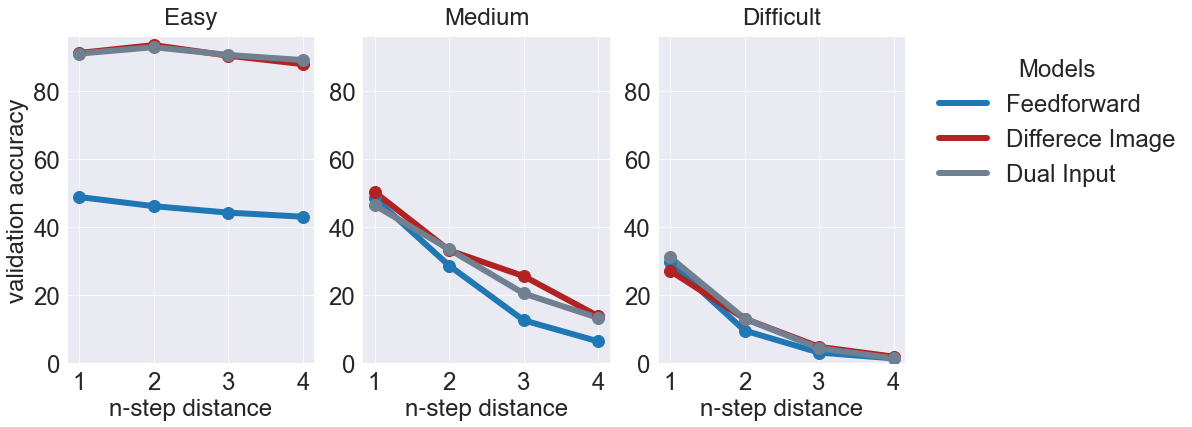

In [2]:
x = [1, 2, 3, 4]

feedforward_maze_easy = [48.8, 46.1, 44.2, 43.0]
feedforward_maze_medium = [48.5, 28.6, 12.5, 6.3]
feedforward_maze_difficult = [29.6, 9.5, 3.0, 1.3]

diffImg_maze_easy = [91.2, 93.5, 90.4, 87.9]
diffImg_maze_medium = [50.3, 33.1, 25.5, 13.7]
diffImg_maze_difficult = [27.1, 13.0, 4.7, 1.8]

dualImg_maze_easy = [91.0, 92.9, 90.6, 89.1]
dualImg_maze_medium = [46.4, 33.4, 20.4, 13.2]
dualImg_maze_difficult = [31.1, 13.0, 4.3, 1.3]

from matplotlib import pyplot as plt
import numpy as np

font = 24
hfont = {'fontname':'Helvetica'}

#plt.rcParams["figure.figsize"] = 25, 5.5
plt.rcParams.update({"font.size": font})
plt.rcParams['axes.titlepad'] = 13 
plt.rcParams['xtick.major.pad']='8' # axis distance
plt.rcParams['ytick.major.pad']='8'

plt.figure(figsize=(15, 6))

with plt.style.context("seaborn-darkgrid"):

    plt.rc("xtick", labelsize=font)
    plt.rc("ytick", labelsize=font)

    plt.title("Model performance", fontsize=font)
    plt.ylabel("validation accuracy", fontsize=font, **hfont)
    plt.xlabel("n-step distance", fontsize=font, **hfont)

    # easy
    plt.subplot(1, 3, 1)
    y1, = plt.plot(x, feedforward_maze_easy, linestyle='solid', c='tab:blue', label='Feedforward', linewidth=6.0)
    y2, = plt.plot(x, diffImg_maze_easy, c='firebrick', linestyle='solid', label='Differece Image', linewidth=6.0)
    y3, = plt.plot(x, dualImg_maze_easy, c='slategray', linestyle='solid', label='Dual Input', linewidth=6.0)

    plt.plot(x, feedforward_maze_easy, c='tab:blue', linestyle='None', marker='o', markersize=12.0)
    plt.plot(x, diffImg_maze_easy, c='firebrick', linestyle='None', marker='o', markersize=12.0)
    plt.plot(x, dualImg_maze_easy, c='slategray', linestyle='None', marker='o', markersize=12.0)
    
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.ylim(ymax = 96, ymin = 0)
    plt.yticks(np.arange(0, 95+1, 20.0))
    plt.ylabel("validation accuracy", fontsize=font, **hfont)
    plt.xlabel("n-step distance", fontsize=font, **hfont)
    plt.title("Easy", fontsize=font, **hfont)


    # medium
    plt.subplot(1, 3, 2)
    plt.plot(x, feedforward_maze_medium, linestyle='solid', c='tab:blue', label='Feedforward.', linewidth=6.0)
    plt.plot(x, diffImg_maze_medium, linestyle='solid', c='firebrick', label='DiffImage', linewidth=6.0)
    plt.plot(x, dualImg_maze_medium, c='slategray', linestyle='solid', label='DualInput', linewidth=6.0)
    
    plt.plot(x, feedforward_maze_medium, c='tab:blue', linestyle='None', marker='o', markersize=12.0)
    plt.plot(x, diffImg_maze_medium, c='firebrick', linestyle='None', marker='o', markersize=12.0)
    plt.plot(x, dualImg_maze_medium, c='slategray', linestyle='None', marker='o', markersize=12.0)
    
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.ylim(ymax = 96, ymin = 0)
    plt.yticks(np.arange(0, 95+1, 20.0))
    plt.xlabel("n-step distance", fontsize=font, **hfont)
    plt.title("Medium", fontsize=font, **hfont)
    
    
    # difficult
    plt.subplot(1, 3, 3)
    plt.plot(x, feedforward_maze_difficult, linestyle='solid', c='tab:blue', label='Feedforward.', linewidth=6.0)
    plt.plot(x, diffImg_maze_difficult, linestyle='solid', c='firebrick', label='Differece Image', linewidth=6.0)
    plt.plot(x, dualImg_maze_difficult, c='slategray', linestyle='solid', label='Dual Input', linewidth=6.0)
    
    plt.plot(x, feedforward_maze_difficult, c='tab:blue', linestyle='None', marker='o', markersize=12.0)
    plt.plot(x, diffImg_maze_difficult, c='firebrick', linestyle='None', marker='o', markersize=12.0)
    plt.plot(x, dualImg_maze_difficult, c='slategray', linestyle='None', marker='o', markersize=12.0)
    
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.ylim(ymax = 96, ymin = 0)
    plt.yticks(np.arange(0, 95+1, 20.0))
    plt.xlabel("n-step distance", fontsize=font, **hfont)
    plt.title("Difficult", fontsize=font, **hfont)
        

    #plt.legend()
    plt.legend(handles=[y1, y2, y3], title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig('feedforward-action-prediction.pdf', bbox_inches="tight")
    plt.show()